In [1]:
import torch

In [2]:
def load_data(excluded_session):
    train_text = torch.load(f"./transcriptions/output_{excluded_session}/train_text_{excluded_session}.pt",map_location=torch.device('cpu'))
    train_speech = torch.load(f"./speech/output_{excluded_session}/train_speech_{excluded_session}.pt",map_location=torch.device('cpu'))
    train_video = torch.load(f"./video/output_{excluded_session}/train_video_{excluded_session}.pt",map_location=torch.device('cpu'))
    concated_data = torch.cat((train_text, train_speech), 1)
    concated_data = torch.cat((concated_data, train_video), 1)
    
    train_labels = torch.load(f"./transcriptions/output_{excluded_session}/train_text_labels{excluded_session}.pt",map_location=torch.device('cpu'))
    
    test_text = torch.load(f"./transcriptions/output_{excluded_session}/test_text_{excluded_session}.pt",map_location=torch.device('cpu'))
    test_speech = torch.load(f"./speech/output_{excluded_session}/test_speech_{excluded_session}.pt",map_location=torch.device('cpu'))
    test_video = torch.load(f"./video/output_{excluded_session}/test_video_{excluded_session}.pt",map_location=torch.device('cpu'))
    concated_test_data = torch.cat((test_text, test_speech), 1)
    concated_test_data = torch.cat((concated_test_data, test_video), 1)

    test_labels = torch.load(f"./transcriptions/output_{excluded_session}/test_text_labels{excluded_session}.pt",map_location=torch.device('cpu'))
    
    return concated_data, train_labels, concated_test_data, test_labels

# train-test splited

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_session_data2D(excluded_session):
    x_train, y_train, x_test, y_test = load_data(excluded_session)
    pca = PCA(n_components=2)
    colors = ['red', 'yellow', 'blue', 'green']
    new_x_train = pca.fit_transform(x_train)
    color_map1 = [colors[i] for i in y_train]
    plt.scatter(new_x_train.T[0], new_x_train.T[1], c=color_map1, s=5)
    plt.show()
    new_x_test = pca.transform(x_test)
    color_map2 = [colors[i] for i in y_test]
    plt.scatter(new_x_test.T[0], new_x_test.T[1], c=color_map2, s=5)
    plt.show()

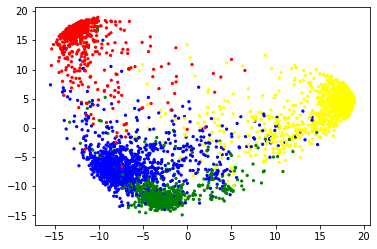

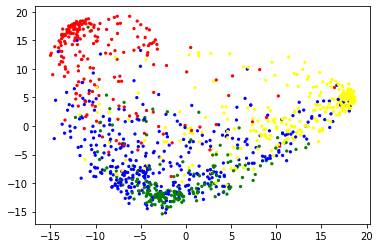

In [4]:
plot_session_data2D(1)

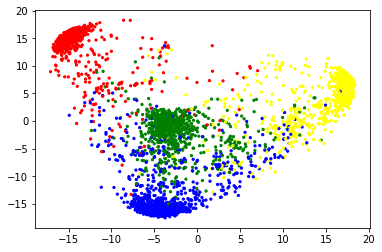

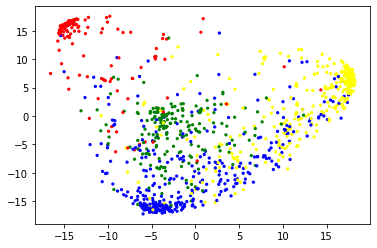

In [5]:
plot_session_data2D(2)

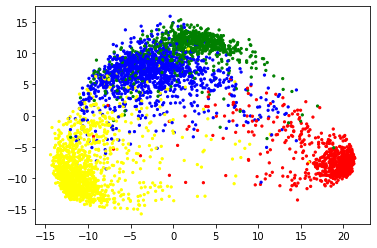

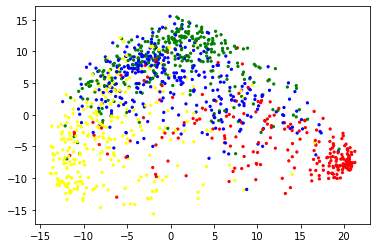

In [6]:
plot_session_data2D(3)

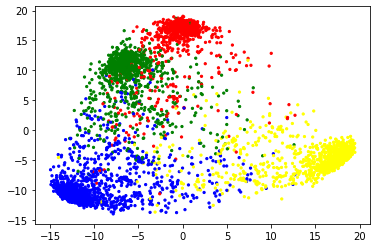

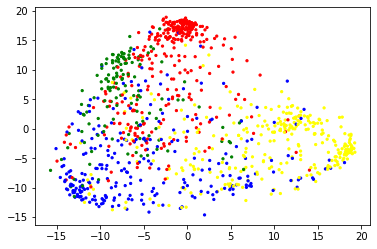

In [7]:
plot_session_data2D(4)

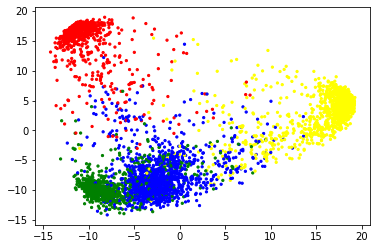

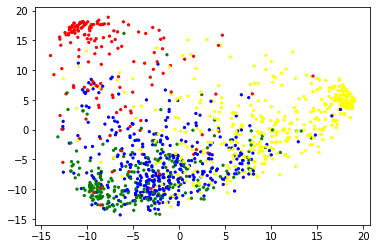

In [8]:
plot_session_data2D(5)

# all data

In [9]:
def plot_data2D(s):
    x_train, y_train, x_test, y_test = load_data(s)
    X = torch.cat((x_train, x_test), 0)
    Y = y_train + y_test
    print(X.shape)
    
    pca = PCA(n_components=2)
    
    colors = ['red', 'yellow', 'blue', 'green']
    new_X = pca.fit_transform(X)
    
    color_map = [colors[i] for i in Y]
    plt.scatter(new_X.T[0], new_X.T[1], c=color_map, s=5)
    plt.show()

torch.Size([5531, 2304])


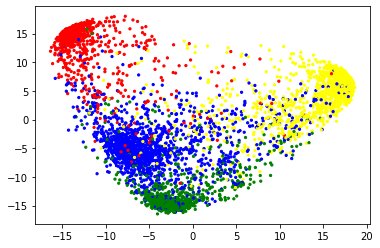

In [10]:
plot_data2D(1)

torch.Size([5531, 2304])


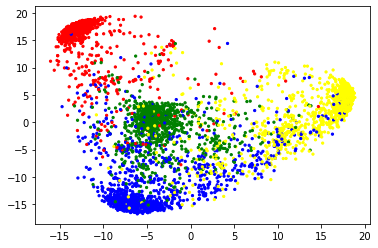

In [11]:
plot_data2D(2)

torch.Size([5531, 2304])


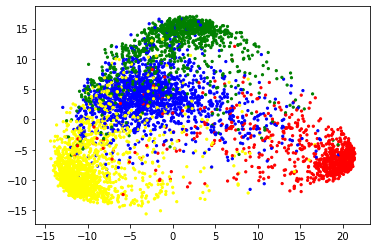

In [12]:
plot_data2D(3)

torch.Size([5531, 2304])


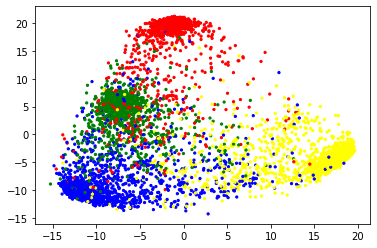

In [13]:
plot_data2D(4)

torch.Size([5531, 2304])


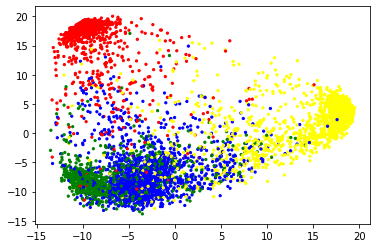

In [14]:
plot_data2D(5)

# only text

In [15]:
def load_data(excluded_session):
    train_text = torch.load(f"./transcriptions/output_{excluded_session}/train_text_{excluded_session}.pt",map_location=torch.device('cpu'))
    '''train_speech = torch.load(f"./speech/output_{excluded_session}/train_speech_{excluded_session}.pt",map_location=torch.device('cpu'))
    train_video = torch.load(f"./video/output_{excluded_session}/train_video_{excluded_session}.pt",map_location=torch.device('cpu'))
    concated_data = torch.cat((train_text, train_speech), 1)
    concated_data = torch.cat((concated_data, train_video), 1)'''
    
    train_labels = torch.load(f"./transcriptions/output_{excluded_session}/train_text_labels{excluded_session}.pt",map_location=torch.device('cpu'))
    
    test_text = torch.load(f"./transcriptions/output_{excluded_session}/test_text_{excluded_session}.pt",map_location=torch.device('cpu'))
    '''test_speech = torch.load(f"./speech/output_{excluded_session}/test_speech_{excluded_session}.pt",map_location=torch.device('cpu'))
    test_video = torch.load(f"./video/output_{excluded_session}/test_video_{excluded_session}.pt",map_location=torch.device('cpu'))
    concated_test_data = torch.cat((test_text, test_speech), 1)
    concated_test_data = torch.cat((concated_test_data, test_video), 1)'''

    test_labels = torch.load(f"./transcriptions/output_{excluded_session}/test_text_labels{excluded_session}.pt",map_location=torch.device('cpu'))
    
    concated_data = train_text
    concated_test_data = test_text
    return concated_data, train_labels, concated_test_data, test_labels

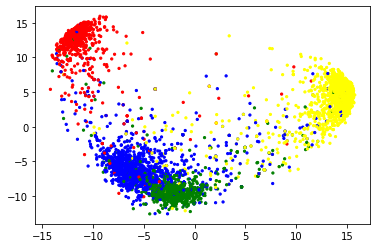

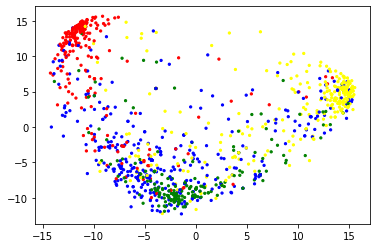

In [16]:
plot_session_data2D(1)

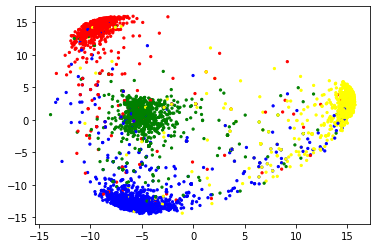

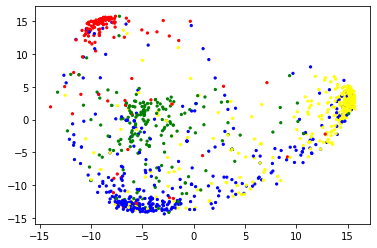

In [17]:
plot_session_data2D(2)

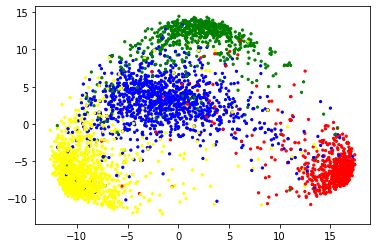

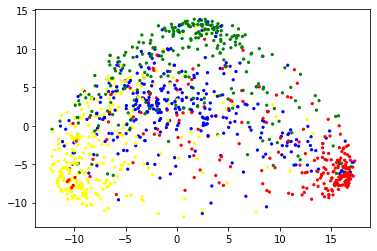

In [18]:
plot_session_data2D(3)

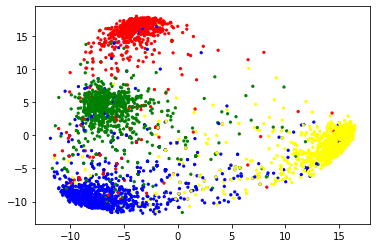

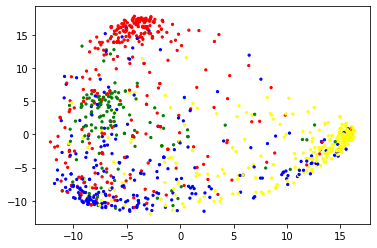

In [19]:
plot_session_data2D(4)

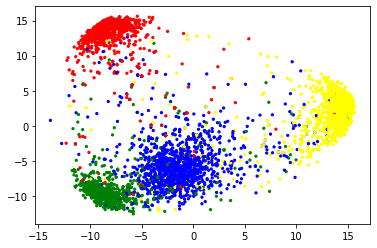

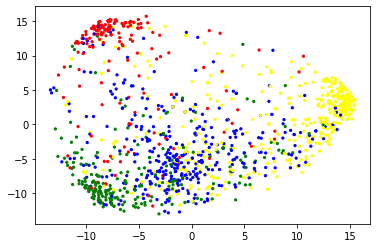

In [20]:
plot_session_data2D(5)

# all data text only

torch.Size([5531, 768])


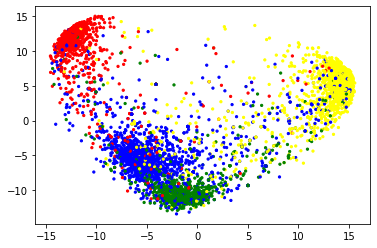

In [21]:
plot_data2D(1)

torch.Size([5531, 768])


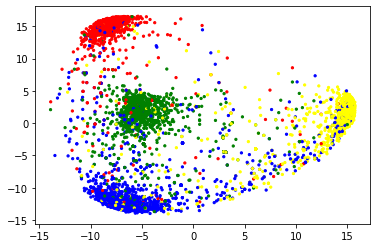

In [22]:
plot_data2D(2)

torch.Size([5531, 768])


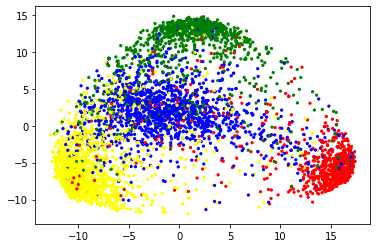

In [23]:
plot_data2D(3)

torch.Size([5531, 768])


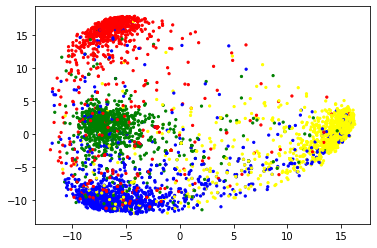

In [24]:
plot_data2D(4)

torch.Size([5531, 768])


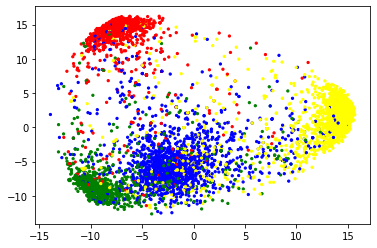

In [25]:
plot_data2D(5)

# speech only

In [26]:
def load_data(excluded_session):
    #train_text = torch.load(f"./transcriptions/output_{excluded_session}/train_text_{excluded_session}.pt",map_location=torch.device('cpu'))
    train_speech = torch.load(f"./speech/output_{excluded_session}/train_speech_{excluded_session}.pt",map_location=torch.device('cpu'))
    '''train_video = torch.load(f"./video/output_{excluded_session}/train_video_{excluded_session}.pt",map_location=torch.device('cpu'))
    concated_data = torch.cat((train_text, train_speech), 1)
    concated_data = torch.cat((concated_data, train_video), 1)'''
    
    train_labels = torch.load(f"./transcriptions/output_{excluded_session}/train_text_labels{excluded_session}.pt",map_location=torch.device('cpu'))
    
    #test_text = torch.load(f"./transcriptions/output_{excluded_session}/test_text_{excluded_session}.pt",map_location=torch.device('cpu'))
    test_speech = torch.load(f"./speech/output_{excluded_session}/test_speech_{excluded_session}.pt",map_location=torch.device('cpu'))
    '''test_video = torch.load(f"./video/output_{excluded_session}/test_video_{excluded_session}.pt",map_location=torch.device('cpu'))
    concated_test_data = torch.cat((test_text, test_speech), 1)
    concated_test_data = torch.cat((concated_test_data, test_video), 1)'''

    test_labels = torch.load(f"./transcriptions/output_{excluded_session}/test_text_labels{excluded_session}.pt",map_location=torch.device('cpu'))
    
    concated_data = train_speech
    concated_test_data = test_speech
    return concated_data, train_labels, concated_test_data, test_labels

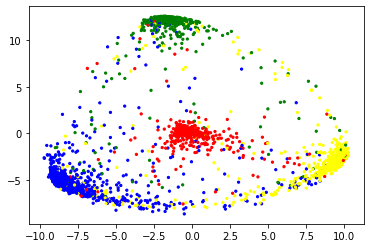

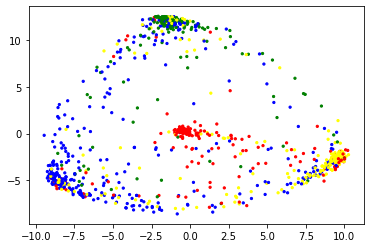

In [27]:
plot_session_data2D(1)

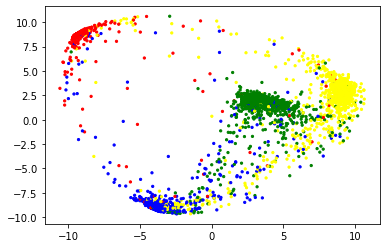

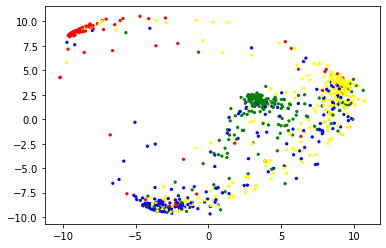

In [28]:
plot_session_data2D(2)

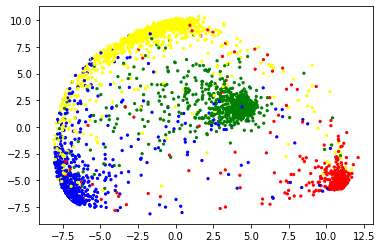

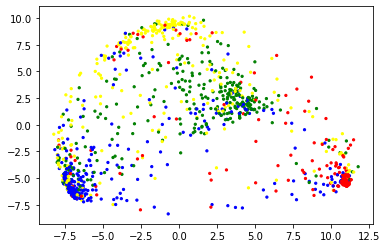

In [29]:
plot_session_data2D(3)

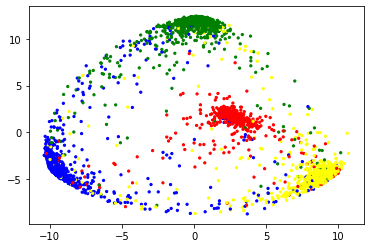

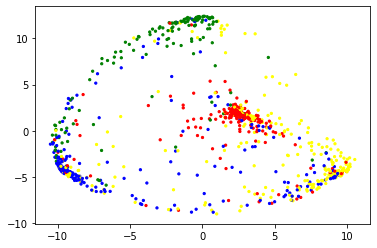

In [30]:
plot_session_data2D(4)

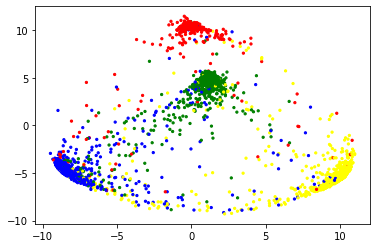

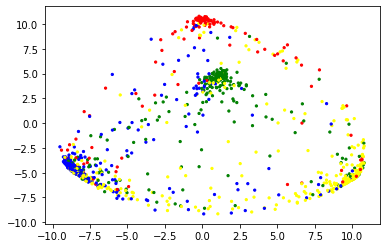

In [31]:
plot_session_data2D(5)

# all data speech only

torch.Size([5531, 768])


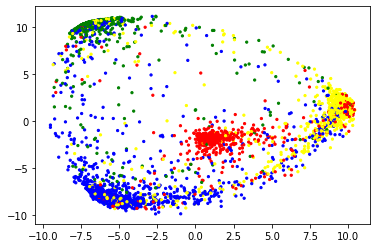

In [32]:
plot_data2D(1)

torch.Size([5531, 768])


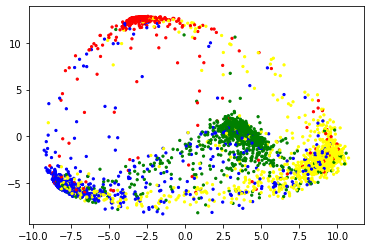

In [33]:
plot_data2D(2)

torch.Size([5531, 768])


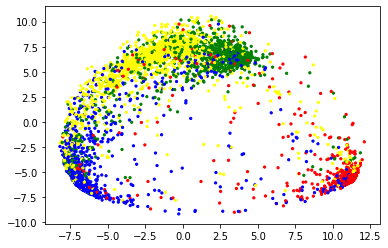

In [34]:
plot_data2D(3)

torch.Size([5531, 768])


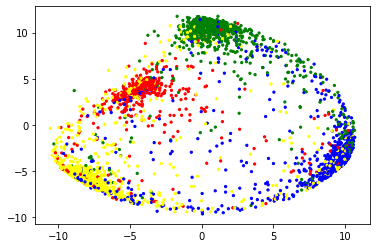

In [35]:
plot_data2D(4)

torch.Size([5531, 768])


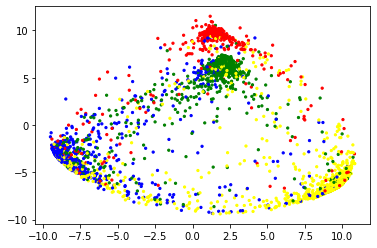

In [36]:
plot_data2D(5)

# video only

In [37]:
def load_data(excluded_session):
    #train_text = torch.load(f"./transcriptions/output_{excluded_session}/train_text_{excluded_session}.pt",map_location=torch.device('cpu'))
    #train_speech = torch.load(f"./speech/output_{excluded_session}/train_speech_{excluded_session}.pt",map_location=torch.device('cpu'))
    train_video = torch.load(f"./video/output_{excluded_session}/train_video_{excluded_session}.pt",map_location=torch.device('cpu'))
    '''concated_data = torch.cat((train_text, train_speech), 1)
    concated_data = torch.cat((concated_data, train_video), 1)'''
    
    train_labels = torch.load(f"./transcriptions/output_{excluded_session}/train_text_labels{excluded_session}.pt",map_location=torch.device('cpu'))
    
    #test_text = torch.load(f"./transcriptions/output_{excluded_session}/test_text_{excluded_session}.pt",map_location=torch.device('cpu'))
    #test_speech = torch.load(f"./speech/output_{excluded_session}/test_speech_{excluded_session}.pt",map_location=torch.device('cpu'))
    test_video = torch.load(f"./video/output_{excluded_session}/test_video_{excluded_session}.pt",map_location=torch.device('cpu'))
    '''concated_test_data = torch.cat((test_text, test_speech), 1)
    concated_test_data = torch.cat((concated_test_data, test_video), 1)'''

    test_labels = torch.load(f"./transcriptions/output_{excluded_session}/test_text_labels{excluded_session}.pt",map_location=torch.device('cpu'))
    
    concated_data = train_video
    concated_test_data = test_video
    #print(concated_data.shape)
    return concated_data, train_labels, concated_test_data, test_labels

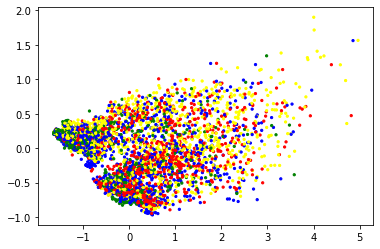

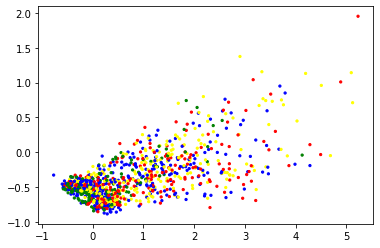

In [38]:
plot_session_data2D(1)

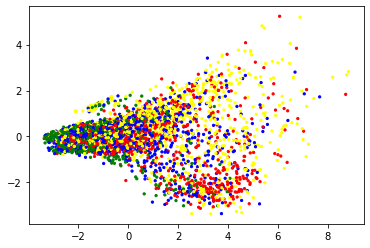

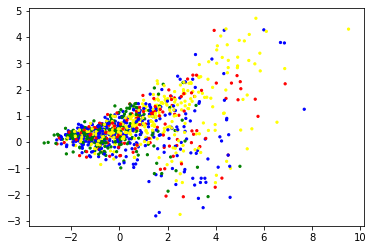

In [39]:
plot_session_data2D(2)

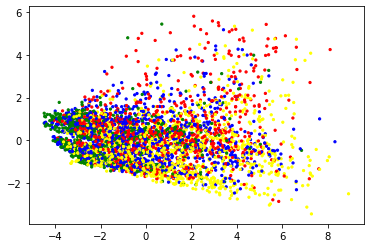

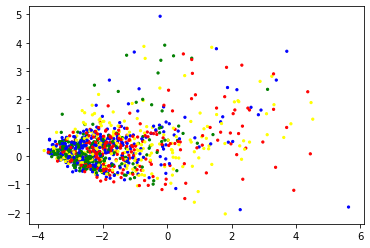

In [40]:
plot_session_data2D(3)

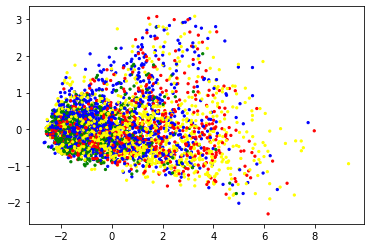

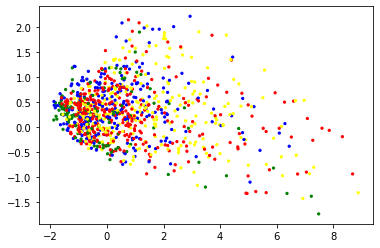

In [41]:
plot_session_data2D(4)

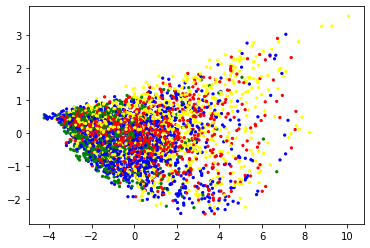

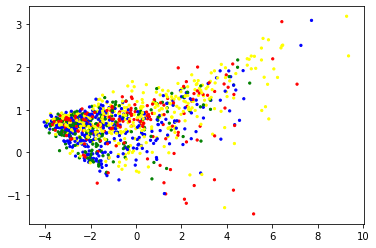

In [42]:
plot_session_data2D(5)

# all data video only 

torch.Size([5531, 768])


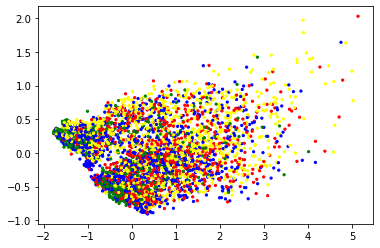

In [43]:
plot_data2D(1)

torch.Size([5531, 768])


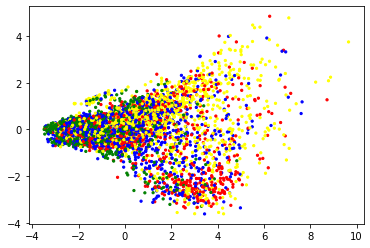

In [44]:
plot_data2D(2)

torch.Size([5531, 768])


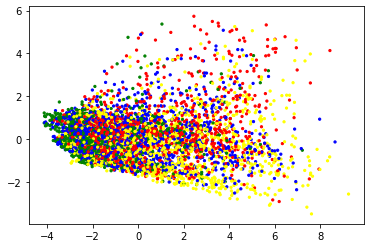

In [45]:
plot_data2D(3)

torch.Size([5531, 768])


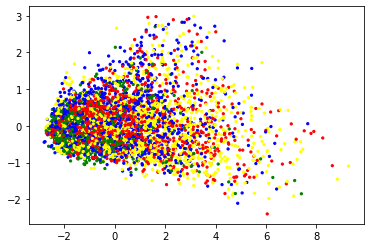

In [46]:
plot_data2D(4)

torch.Size([5531, 768])


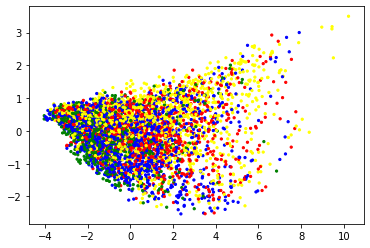

In [47]:
plot_data2D(5)